# Red Neuronal para la identificación de señales de transito 
La siguiente red neuronal fue realizada por Karen Posada y Juan Camilo Lopera, con ayuda del curso de deep learning de la plataforma Udemy.

**1. Importamos las librerias necesarias para la red neuronal**

*   Tensfor Flow : Para la creación, entrenamiento y evaluación del modelo
*   Skimage : para el uso de imagenes
*   Numpy: para el uso de arreglos
*   Random : para tomar elementos aleatorio para probar el modelo
*   Matplotlib : para graficar los datos








In [ ]:
import tensorflow as tf
import os #para manejo de archivos
import skimage.io as imd #un sklearn para imagenes
import numpy as np
import datetime #informacion con el tiempo de TF
import matplotlib.pyplot as plt #para graficar
### ===== para tratar las imagenes
from skimage import transform #para redimensionar las imagenes
from skimage.color import rgb2gray#convertir a espacio de color gris. (hay muchos mas como rojo, verde, azul)
import random 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

**2. Crear función para llamar los datos de prueba y testeo**
Es necesario tener una función que llame los datos que vamos a usar para la prueba, para que sean almacenados en dos variables, una que seran los datos y el otro seran las etitquetas de los datos

In [ ]:
#Funcion para importar los datos ==============================
def load_ml_data(data_directory):#recibo la ruta de los datos
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]#voy pasando item por item de cada directorio listo todos 
                                                            #los directorios que se pueden obtener a partir de data_directory
    
    #print(dirs)#muestro directorios DEBUG
    
    labels = [] #array de etiquetas para las fotos
    images = [] #el archivo de imagen en si
    for d in dirs:
        label_dir = os.path.join(data_directory, d)#entro a cada carpeta en la lista dirs
        file_names = [os.path.join(label_dir,f) #reviso cada item del directorio SI es un archivo de imagen lo guardo 
                     for f in os.listdir(label_dir)   
                     if f.endswith(".ppm")]
     
        for f in file_names:
            images.append(imd.imread(f))#leo imagen y la agrego a images conm el formato de datos para skimage
            labels.append(int(d))#numeros enteros para los labels
            
    return images, labels

In [ ]:
main_dir = "/content/drive/My Drive/dataset"
training_data_dir = os.path.join(main_dir,"Training")
testing_data_dir = os.path.join(main_dir,"Testing")

In [ ]:
X_train, Y_train = load_ml_data(training_data_dir)
X_test, Y_test = load_ml_data(testing_data_dir)

**3. Pre procesamiento de los datos**
Antes de trabajar con los datos, primero debemos entender su comportamiento, por eso con ayuda de numpy y matplotlib, examinaremos sus características

In [ ]:
X_img_train = np.array(X_train)
Y_lbl_train = np.array(Y_train)
X_img_test = np.array(X_test)
Y_lbl_test = np.array(Y_test)

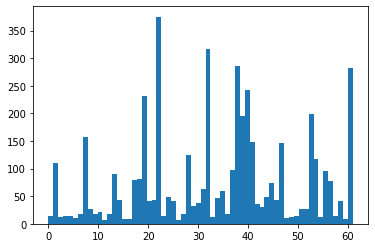

In [ ]:
plt.hist(Y_lbl_train, len(set(Y_lbl_train)))
plt.show()

In [ ]:
rand_signs = random.sample(range(0,len(Y_lbl_train)),6)#quiero una muestra aleatoria simple
rand_signs

[444, 3039, 2441, 617, 3859, 1443]

In [ ]:
def data_random(random_img,dtset_evaluado):#dataset evaluado recibe el conjunto de imagenes (el completo) sobre el cual vamos a iterar
    for i in range(len(rand_signs)):
        temp_img = dtset_evaluado[rand_signs[i]]#imagen actual 
        plt.subplot(1,6,i+1)#dibujo 6 columnas (6 fotitos)
        plt.axis("off")
        plt.imshow(temp_img)#muestro las imagenes 
        plt.subplots_adjust(wspace=0.5)#espacio para que las imagenes no salgan muy pegadas

        plt.show()#muestro

        #la sigueinte notacion viene de Django, me permite poner parametros al texto que se encuentra numerado entre las llaves
        print("Forma: {0}, Min: {1}, Max:{2}".format(temp_img.shape,#altura y ancho
                                                     temp_img.min(),#pixel con menor color
                                                     temp_img.max()))#pixel con mas color

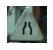

Forma: (119, 129, 3), Min: 0, Max:255


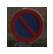

Forma: (121, 119, 3), Min: 11, Max:162


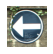

Forma: (372, 363, 3), Min: 0, Max:255


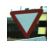

Forma: (124, 142, 3), Min: 0, Max:255


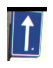

Forma: (133, 97, 3), Min: 0, Max:255


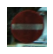

Forma: (80, 79, 3), Min: 2, Max:229


In [ ]:
data_random(rand_signs, X_img_train)

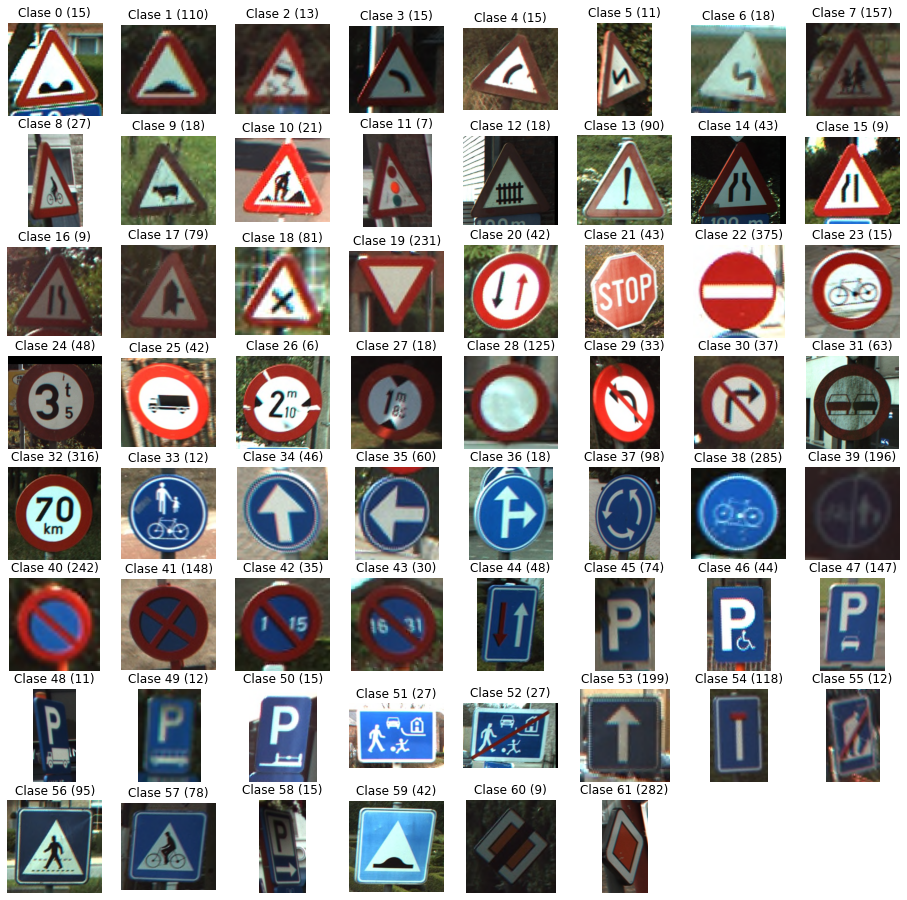

In [ ]:
unique_labels = set(Y_lbl_train)#etiquetas unicas
plt.figure(figsize=(16,16))#tamaño de la figura aqui
i=1
for label in unique_labels:
    temp_img = X_img_train[list(Y_lbl_train).index(label)]#me quedo con la imagen en la posicion del indice NO en el indice
    #se convierte en lista para poder usar la propiedad index
    #con esa posicion busco la imagen de la cual procede
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label,list(Y_lbl_train).count(label)))
    i+=1 #manejo contador
    plt.imshow(temp_img)#muestro imagen en bucle
    
plt.show()

In [ ]:
#deseo conocer el tamaño de imagen mas pequeño que me puedo encontrar
w = 9999
h = 9999
for image in X_img_train:#paso por todas las imagenes. El tamaño minimo puede ser combinacion de dos fotos diferentes
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print ("tamaño minimo: {0},{1}".format(h,w))

tamaño minimo: 22,20


In [ ]:
X_img_train30 = [transform.resize(image,(30,30)) for image in X_img_train]

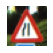

Forma: (30, 30, 3), Min: 0.0392156862745098, Max:0.996078431372549


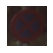

Forma: (30, 30, 3), Min: 0.09362745098039217, Max:0.3553921568627454


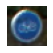

Forma: (30, 30, 3), Min: 1.6718652606119448e-17, Max:0.9884705882352932


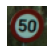

Forma: (30, 30, 3), Min: 0.024888888888888842, Max:0.6823529411764706


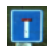

Forma: (30, 30, 3), Min: 0.054901960784313725, Max:0.9951633986928108


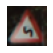

Forma: (30, 30, 3), Min: 0.0392156862745098, Max:0.7429172113289759


In [ ]:
#revisamos nuevamente el tamaño, ahora con el cambio aplicado
rand_signs = random.sample(range(0, len(Y_lbl_train)), 6)#genero aleatorio
data_random(rand_signs,X_img_train30)

In [ ]:
X_img_train30 = np.array(X_img_train30) #tamaño y tipo de dato correcto para skimage
X_img_train30 = rgb2gray(X_img_train30) #Las pasamos a blanco y negro

# Conclusiones del pre-procesamiento de los datos 
Los datos de prueba  tienen ciertas características las cuales pueden servir a la red para identificar familias de datos ( La cual fue realizada bajo aprendizaje no supervisado) Pero no nos darían la efectividad que nosotros deseamos, ni la clasificación deseada.... Entonces algunas de las caracteristicas que tenemos que neutralizar son:

*   **Tamaño:** El tamaño de las imegenes no puede servir como característica de clasficación, ya que hay imagenes que estan dentro del mismo grupo que contienen diferentes tamaños 
*   **Color:** El color es otra caracteristica que debemos neutralizar, ya que varias imagenes pertenicientes al mismo grupo sufrieron una decoloración al estar expuestas bajo el sol constante. 




# Creación del Modelo 
Ya teniendo nuestros datos pre procesados es necesario crear el modelo de nuestra red neuronal con los conocimientos adquiridos de la investigación, la cual se pueden ver en el pdf adjunto a este documento 

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(30,30))) #capa de aplanado que recibe 900 pixeles 30*30 c/u de las imagenes
model.add(tf.keras.layers.Dense(units=130, activation="relu")) #activador relu, 130 neuronas
model.add(tf.keras.layers.Dense(units=256, activation="sigmoid"))#nueva capa para mejorar efectividad
model.add(tf.keras.layers.Dropout(0.2)) #capa DropOut, 20% NO aprende. Esto para mejorar su eficacia con datos diferentes a los de test
model.add(tf.keras.layers.Dense(units=62, activation='softmax'))
#capa de salida, 62 diferentes categorias


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary() #resumen de los datos de mi modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 900)               0         
_________________________________________________________________
dense (Dense)                (None, 130)               117130    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33536     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                15934     
Total params: 166,600
Trainable params: 166,600
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_img_train30, Y_lbl_train, epochs=10)

Epoch 1/10
143/143 [==============================] - 0s 2ms/step - loss: 0.4732 - sparse_categorical_accuracy: 0.8625
Epoch 2/10
143/143 [==============================] - 0s 2ms/step - loss: 0.4206 - sparse_categorical_accuracy: 0.8804
Epoch 3/10
143/143 [==============================] - 0s 2ms/step - loss: 0.3774 - sparse_categorical_accuracy: 0.8890
Epoch 4/10
143/143 [==============================] - 0s 2ms/step - loss: 0.3522 - sparse_categorical_accuracy: 0.8957
Epoch 5/10
143/143 [==============================] - 0s 2ms/step - loss: 0.3218 - sparse_categorical_accuracy: 0.9058
Epoch 6/10
143/143 [==============================] - 0s 2ms/step - loss: 0.2939 - sparse_categorical_accuracy: 0.9174
Epoch 7/10
143/143 [==============================] - 0s 2ms/step - loss: 0.2857 - sparse_categorical_accuracy: 0.9102
Epoch 8/10
143/143 [==============================] - 0s 2ms/step - loss: 0.2569 - sparse_categorical_accuracy: 0.9246
Epoch 9/10
143/143 [============================

# Entendiendo el modelo
Como se puede observar en cada iteración va bajando el error de nuestro modelo, ya que decidimos usar el descendo del gradiente estocastico en su versión Adam para optimizar el modelo

In [ ]:
#doy tamaño 30x30 a todas las imagenes de la carpeta de evaluación. las mas pequeñas las hara mas grandes
X_img_test30 = [transform.resize(image,(30,30)) for image in X_img_test]
#X_img_test30[0]#los valores cambiaron --> ahora tiene 900 pixeles
X_img_test30 = np.array(X_img_test30) #tamaño y tipo de dato correcto para skimage
X_img_test30 = rgb2gray(X_img_test30)#color gris

In [ ]:
test_loss, test_accuracy = model.evaluate(X_img_test30, Y_lbl_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.4663 - sparse_categorical_accuracy: 0.8694


In [ ]:
predicciones = model.predict(X_img_test30)#el modelo ha predecido la clase para cada imagen del set de testing

In [ ]:
ejemplo_idx = random.sample(range(len(X_img_test30)), 16)# numero aleatorios en rango de imagenes

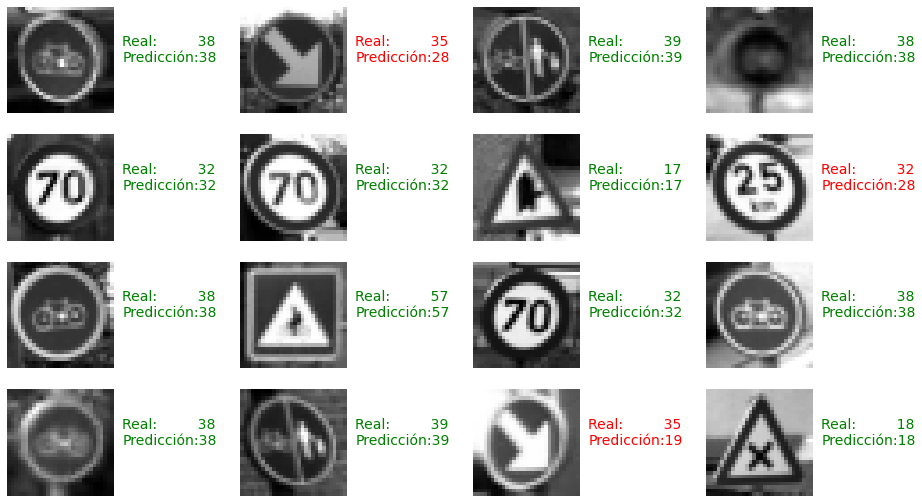

In [ ]:
plt.figure(figsize=(16,9))#tamaño de imagen a mostrar
m=1#para controlar lugar sobre el cual dibujar
for i in ejemplo_idx:#en el rango de mis 10 valores generados
    verdadero = Y_lbl_test[i]#la etiqueta real de la imagen predicha (del dataset de etiquetas para testing)
    predicho = np.argmax(predicciones[i])#valor de etiqueta predecido por la RNA
    #print(verdadero, ":", predecido)
    plt.subplot(4,4,m)
    m+=1
    plt.axis("off")
    color = "green" if verdadero == predicho else "red"
    plt.text(32,15, "Real:         {0}\nPredicción:{1}".format(verdadero,predicho), fontsize=14, color = color)
    plt.imshow(X_img_test30[i], cmap="gray")
plt.show()

# La presición del modelo

Vamos a ver que tan preciso fue nuestro modelo a través de la libreria Matplotlib

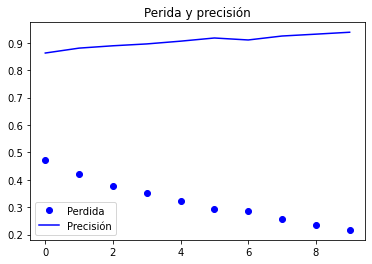

In [ ]:
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']


epochs = range(len(acc))
plt.figure()

plt.plot(epochs, loss, 'bo', label='Perdida')
plt.plot(epochs, acc, 'b', label='Precisión')
plt.title('Perida y precisión')
plt.legend()

plt.show()

# **Conclusiones**
El modelo pudo predecir la mayoria de imagenes de prueba, cabe aclarar que este ejemplo es mínimo y no requiere una gran cantidad de capas ocultas para tener el resultado deseado.

In [ ]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("fashion_model.h5") #guardar los pesos de la red neuronal